<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Подготовка тестов через doctest (запустить для корректной работы остальных блоков)

import doctest
from IPython.core.magic import register_cell_magic

# Магия ячейки для запуска doctest
@register_cell_magic
def doctest_magic(line, cell):
    # Инициализируем код из ячейки
    exec(cell, globals())

    # Ищем все локальные объекты
    local_vars = {}
    exec(cell, globals(), local_vars)

    # Проходим по всем объектам в локальных переменных и ищем docstring'и для тестирования
    for name, obj in local_vars.items():
        if callable(obj):  # Проверяем, объект является функцией или классом
            print(f"Running doctests for {name}...\n")
            try:
                doctest.run_docstring_examples(obj, globals(), name=name, verbose=True)
            except Exception as e:
                print(f"Error running doctests for {name}: {e}")


<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [10]:
%%doctest_magic

def sum_prod(x, v):
    '''
    >>> sum_prod ([[[1, 2],[3, 4]],[[5, 6],[7, 8]]], [[2,4],[7,9]])
    [ 99 143]
    '''
    summ = 0
    for i in range (len(x)):
        summ += np.array(x[i])@np.array(v[i])
    print(summ)

Running doctests for sum_prod...

Finding tests in sum_prod
Trying:
    sum_prod ([[[1, 2],[3, 4]],[[5, 6],[7, 8]]], [[2,4],[7,9]])
Expecting:
    [ 99 143]
ok


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [13]:
%%doctest_magic

def binarize(M, threshold=0.5):
    '''
    >>> binarize ([[0.1, 0.2, 0.3],[0.4, 0.5, 0.6],[0.7, 0.8, 0.9]])
    [[0 0 0]
     [0 0 1]
     [1 1 1]]
    '''
    M = np.array(M)
    print(np.where(M > threshold, 1, 0))

Running doctests for binarize...

Finding tests in binarize
Trying:
    binarize ([[0.1, 0.2, 0.3],[0.4, 0.5, 0.6],[0.7, 0.8, 0.9]])
Expecting:
    [[0 0 0]
     [0 0 1]
     [1 1 1]]
ok


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
%%doctest_magic

def unique_rows(mat):
    '''
    >>> unique_rows ([[1, 2, 2],[2, 4, 2],[1, 4, 1]])
    [1, 4, 4]
    '''
    print(unique(mat))
def unique_columns(mat):
    '''
    >>> unique_columns ([[1, 2, 2],[2, 4, 2],[1, 4, 1]])
    [2, 2, 1]
    '''
    mat = (np.array(mat).T).tolist()
    print(unique(mat))

def unique(arr):
    unic = []
    for row in arr:
        for i in row:
            if (row.count(i) == 1):
                unic.append(i)
    return unic

Running doctests for unique_rows...

Finding tests in unique_rows
Trying:
    unique_rows ([[1, 2, 2],[2, 4, 2],[1, 4, 1]])
Expecting:
    [1, 4, 4]
ok
Running doctests for unique_columns...

Finding tests in unique_columns
Trying:
    unique_columns ([[1, 2, 2],[2, 4, 2],[1, 4, 1]])
Expecting:
    [2, 2, 1]
ok
Running doctests for unique...

Finding tests in unique


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

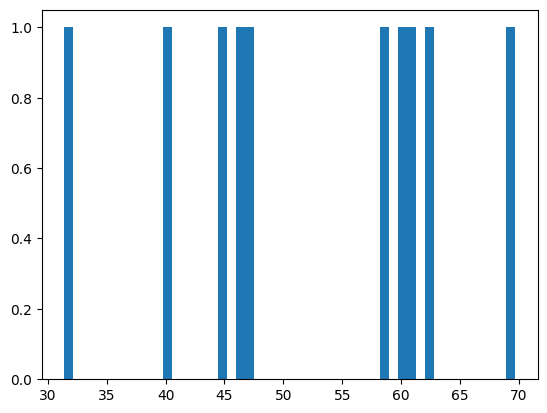

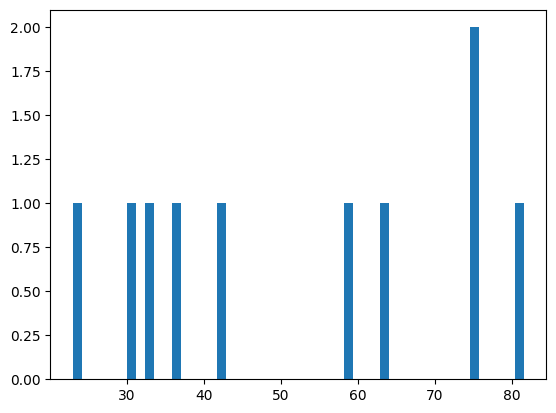

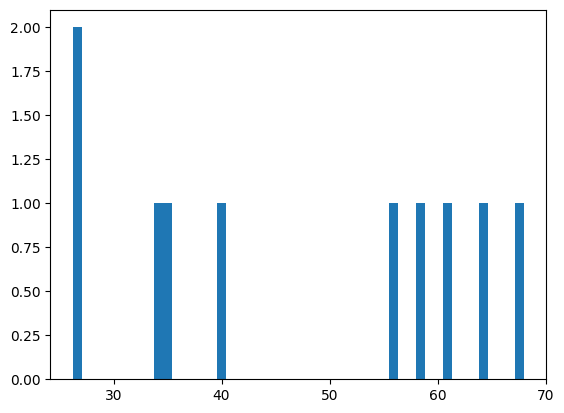

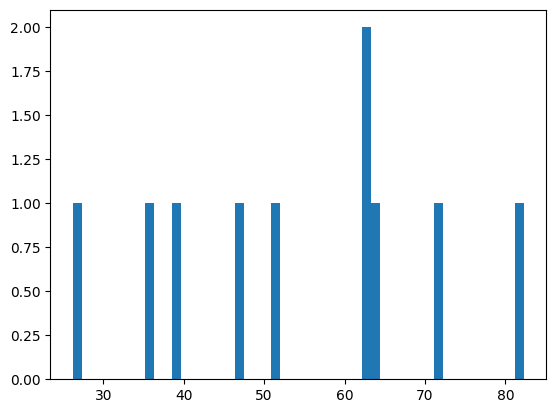

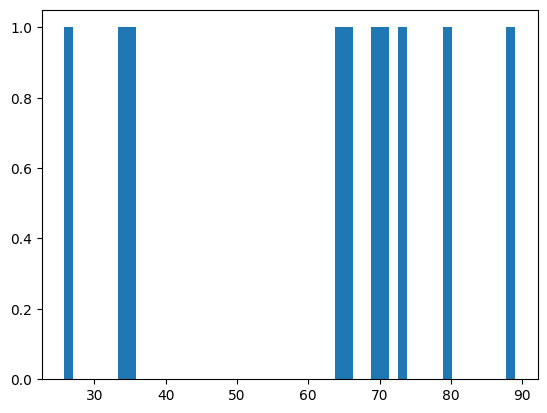

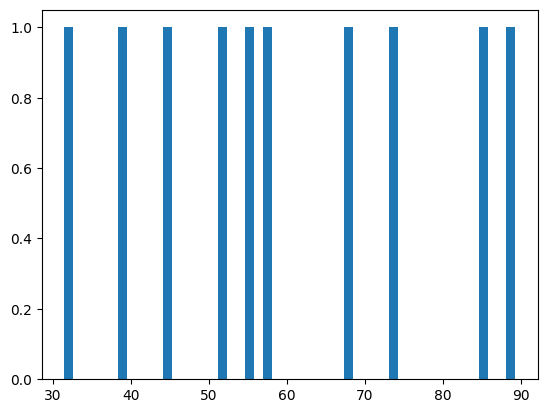

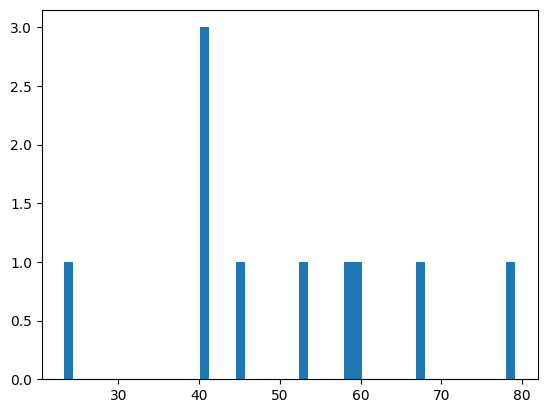

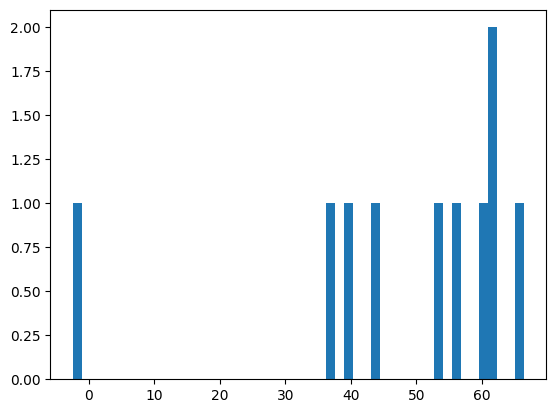

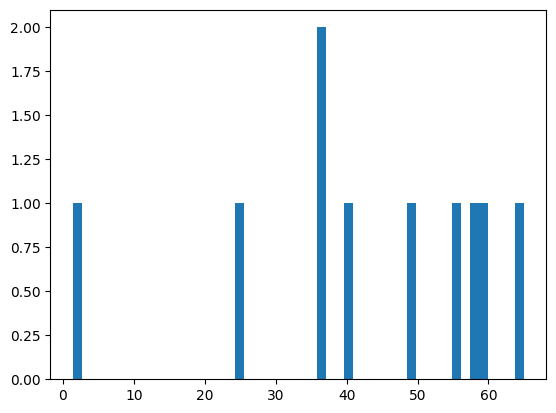

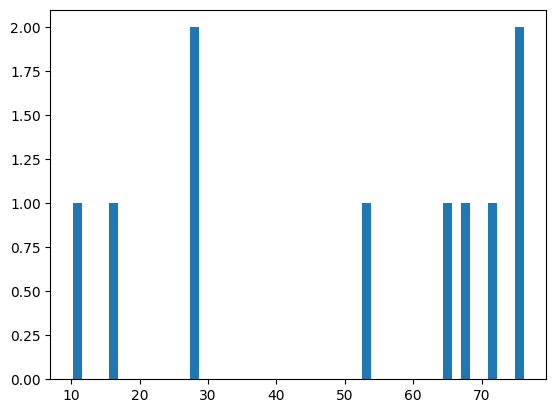

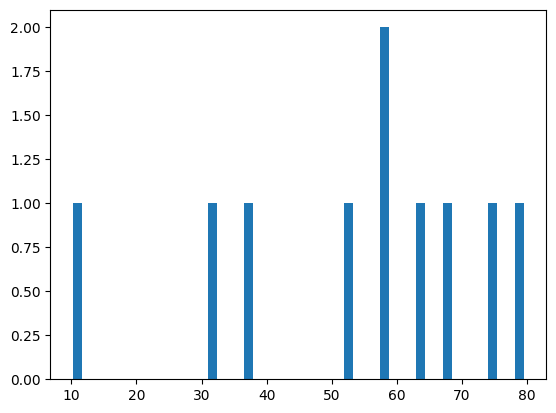

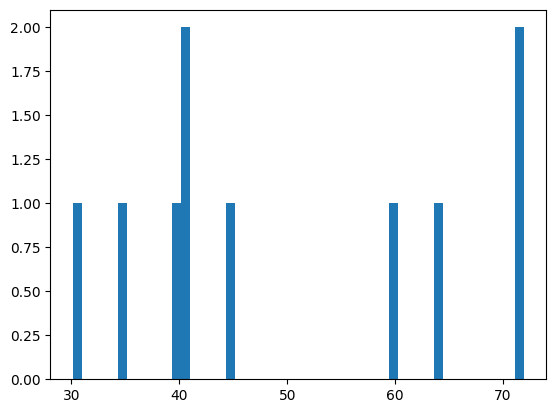

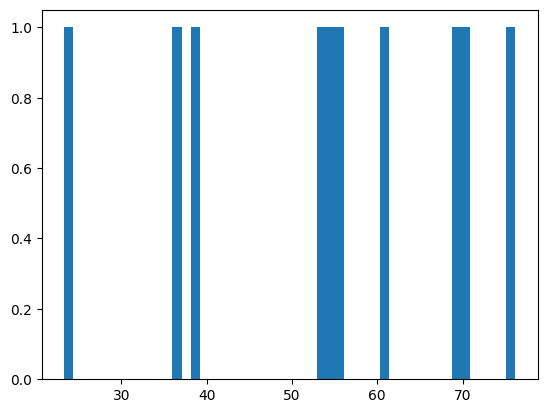

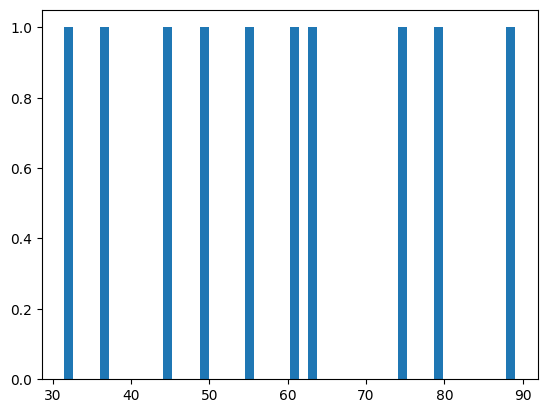

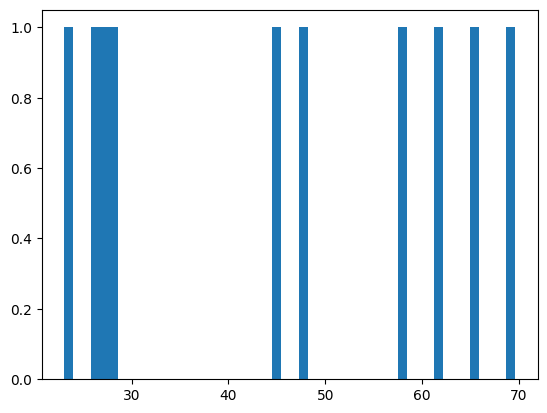

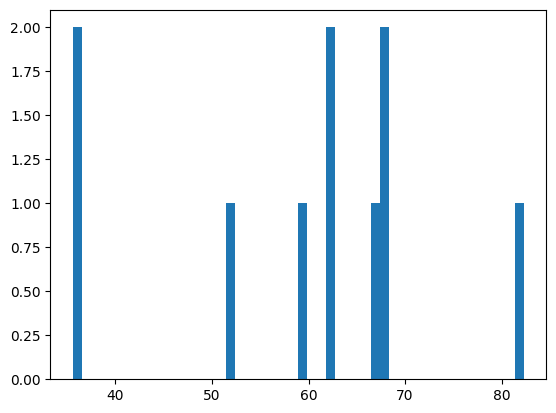

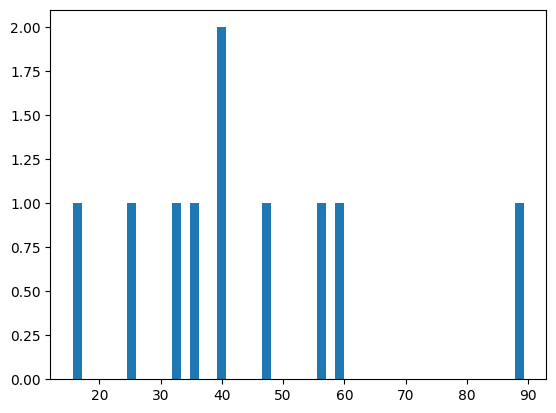

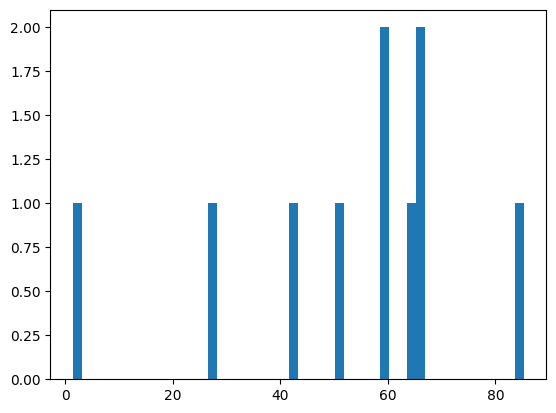

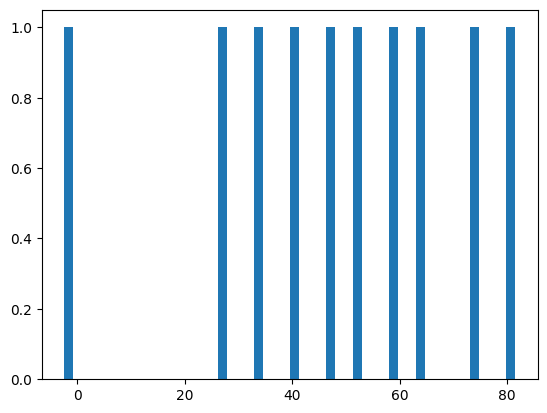

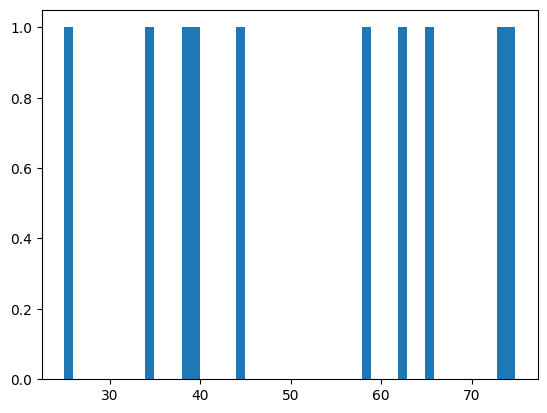

[52.19727280894726, 51.81827099961646, 47.0168536913171, 54.32582863957091, 60.70716437319645, 59.54649128350718, 50.725647933707464, 47.8100820967558, 42.64494209733341, 49.10893646009903]
[11.343464433082454, 20.272359159230863, 15.286963528251684, 16.552299284631378, 20.254477553837344, 18.24994669091785, 15.233832527271812, 19.322252309153626, 18.349370589739763, 24.623315821207182]
[53.29931652400569, 49.85319320086236, 54.03958017233324, 58.446408670873055, 45.120951927453525, 59.25975085725548, 44.30036664903306, 52.391712305548275, 47.52565093166377, 51.66455914502261]
[20.271488922772647, 14.795091641842326, 15.916129911115773, 17.892306035137644, 16.997755464972315, 13.813506769411344, 19.496233089366537, 22.396850287802078, 23.35044603208874, 16.60057404768654]


In [19]:
# Нормальное распределение на гистограммах видно только при большом числе столбцов и строк (100х100)
# Однако из-за необходимости вывести гистограммы для каждой строки и столбца, вывод
# становится слишком большим

def normal_matrix(m,n):
    arr = np.random.normal(50, 20, size=(m, n))
    rows_M = []
    rows_D = []
    columns_M = []
    columns_D = []
    for row in arr:
        rows_M.append(float(row.mean()))
        rows_D.append(float(row.std()))
        plt.hist(row, bins=50)
        plt.show()
    for i in range(m):
        columns_M.append(float(arr[:, i].mean()))
        columns_D.append(float(arr[:, i].std()))
        plt.hist(arr[:, i], bins=50)
        plt.show()
    print(rows_M)
    print(rows_D)
    print(columns_M)
    print(columns_D)

normal_matrix(10, 10)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [22]:
%%doctest_magic

def chess(m, n, a, b):
    '''
    >>> chess (5, 5, 1, 0)
    [[1 0 1 0 1]
     [0 1 0 1 0]
     [1 0 1 0 1]
     [0 1 0 1 0]
     [1 0 1 0 1]]
    '''
    matrix = np.full((m,n), b)
    matrix[::2, ::2] = a
    matrix[1::2, 1::2] = a
    print(matrix)

Running doctests for chess...

Finding tests in chess
Trying:
    chess (5, 5, 1, 0)
Expecting:
    [[1 0 1 0 1]
     [0 1 0 1 0]
     [1 0 1 0 1]
     [0 1 0 1 0]
     [1 0 1 0 1]]
ok


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [33]:
%%doctest_magic
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
     '''
    >>> draw_rectangle (50, 70, 100, 100, (255, 0, 0), (128, 128, 128))

    '''
     img = Image.new('RGB', (m, n), background_color)
     draw = ImageDraw.Draw(img)
     draw.rectangle((0, 0, a, b), fill=rectangle_color)
     img.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    '''
    >>> draw_ellipse (40, 60, 100, 100, (0, 192, 192), (128, 128, 128))

    '''
    img = Image.new('RGB', (m, n), background_color)
    draw = ImageDraw.Draw(img)
    draw.ellipse((0, 0, a, b), fill=ellipse_color)
    img.show()

Running doctests for draw_rectangle...

Finding tests in draw_rectangle
Trying:
    draw_rectangle (50, 70, 100, 100, (255, 0, 0), (128, 128, 128))
Expecting nothing
ok
Running doctests for draw_ellipse...

Finding tests in draw_ellipse
Trying:
    draw_ellipse (40, 60, 100, 100, (0, 192, 192), (128, 128, 128))
Expecting nothing
ok


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [34]:
%%doctest_magic

def time_series(arr, window):
    '''
    >>> time_series ([2, 4, 5, 11, 12, 12, 10, 15, 9, 7, 8, 4], 3) #Температура каждые 2 часа
    8.25
    14.354166666666666
    3.788689307223102
    [10, 7]
    [15, 8]
    [ 3.66666667  6.66666667  9.33333333 11.66666667 11.33333333 12.33333333
     11.33333333 10.33333333  8.          6.33333333]
    '''
    vect = np.array(arr)
    vect_ext = np.hstack([np.nan, vect, np.nan])
    print(vect.mean())
    print(vect.var())
    print(vect.std())
    loc_min = []
    loc_max = []
    for i in range(len(vect)):
        if vect_ext[i] > vect_ext[i-1] and vect_ext[i] > vect_ext[i+1]:
            loc_max.append(int(vect_ext[i]))
        if vect_ext[i] < vect_ext[i-1] and vect_ext[i] < vect_ext[i+1]:
            loc_min.append(int(vect_ext[i]))
    print(loc_min)
    print(loc_max)
    print(np.convolve(vect, np.ones(window)/window, 'valid'))


Running doctests for time_series...

Finding tests in time_series
Trying:
    time_series ([2, 4, 5, 11, 12, 12, 10, 15, 9, 7, 8, 4], 3) #Температура каждые 2 часа
Expecting:
    8.25
    14.354166666666666
    3.788689307223102
    [10, 7]
    [15, 8]
    [ 3.66666667  6.66666667  9.33333333 11.66666667 11.33333333 12.33333333
     11.33333333 10.33333333  8.          6.33333333]
ok


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [36]:
%%doctest_magic

def one_hot_encoding(vect):
    '''
    >>> one_hot_encoding ([0, 2, 3, 0, 1])
    [[1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0.]
     [0. 0. 0. 1. 0.]
     [1. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0.]]
    '''
    l = len(vect)
    mtx = np.zeros((l,l))
    for i in range(l):
        mtx[i,vect[i]] = 1
    print(mtx)

Running doctests for one_hot_encoding...

Finding tests in one_hot_encoding
Trying:
    one_hot_encoding ([0, 2, 3, 0, 1])
Expecting:
    [[1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0.]
     [0. 0. 0. 1. 0.]
     [1. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0.]]
ok
